# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *


Bad key savefig.frameon in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [7]:
tf.reset_default_graph()

In [8]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/mgaltier200/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [9]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 996/30000 [00:19<07:40, 62.97it/s] 

Saved checkpoint for step 1000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.186264
INFO:tensorflow:53.572 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.10
INFO:tensorflow:		 predicted_dist = 15.8 (0.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 15.6 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.1 (0.6)
INFO:tensorflow:	 eval_time = 3.95


  7%|▋         | 1995/30000 [00:39<07:43, 60.41it/s]  

Saved checkpoint for step 2000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 1.534919
INFO:tensorflow:68.329 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.50
INFO:tensorflow:		 predicted_dist = 15.4 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.10
INFO:tensorflow:		 predicted_dist = 17.0 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.50
INFO:tensorflow:		 predicted_dist = 17.8 (0.5)
INFO:tensorflow:	 eval_time = 2.93


 10%|▉         | 2995/30000 [00:58<07:24, 60.77it/s]  

Saved checkpoint for step 3000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 0.877504
INFO:tensorflow:67.849 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.40
INFO:tensorflow:		 predicted_dist = 17.4 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.9 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.2 (0.9)
INFO:tensorflow:	 eval_time = 2.95


 13%|█▎        | 3995/30000 [01:17<07:20, 59.05it/s]  

Saved checkpoint for step 4000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.231512
INFO:tensorflow:67.382 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.50
INFO:tensorflow:		 predicted_dist = 15.1 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.90
INFO:tensorflow:		 predicted_dist = 16.4 (0.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.3 (0.4)
INFO:tensorflow:	 eval_time = 2.92


 17%|█▋        | 4993/30000 [01:36<06:42, 62.16it/s]  

Saved checkpoint for step 5000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 1.249928
INFO:tensorflow:67.136 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.10
INFO:tensorflow:		 predicted_dist = 16.6 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.5 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.0 (0.3)
INFO:tensorflow:	 eval_time = 2.91


 20%|█▉        | 5997/30000 [01:56<06:33, 61.01it/s]  

Saved checkpoint for step 6000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 1.052170
INFO:tensorflow:66.949 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.60
INFO:tensorflow:		 predicted_dist = 16.8 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.30
INFO:tensorflow:		 predicted_dist = 17.6 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.6 (0.4)
INFO:tensorflow:	 eval_time = 2.94


 23%|██▎       | 6999/30000 [02:15<07:36, 50.35it/s]

Saved checkpoint for step 7000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 1.102749
INFO:tensorflow:67.659 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.7 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.70
INFO:tensorflow:		 predicted_dist = 18.2 (0.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 18.8 (0.2)
INFO:tensorflow:	 eval_time = 2.98


 27%|██▋       | 7997/30000 [02:34<05:56, 61.75it/s]  

Saved checkpoint for step 8000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 1.014186
INFO:tensorflow:67.930 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.10
INFO:tensorflow:		 predicted_dist = 16.6 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.90
INFO:tensorflow:		 predicted_dist = 17.9 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.60
INFO:tensorflow:		 predicted_dist = 18.7 (0.3)
INFO:tensorflow:	 eval_time = 3.26


 30%|██▉       | 8996/30000 [02:53<05:54, 59.26it/s]

Saved checkpoint for step 9000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 1.518161
INFO:tensorflow:66.482 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.80
INFO:tensorflow:		 predicted_dist = 14.8 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.70
INFO:tensorflow:		 predicted_dist = 17.8 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.40
INFO:tensorflow:		 predicted_dist = 18.1 (1.0)
INFO:tensorflow:	 eval_time = 2.80


 33%|███▎      | 9994/30000 [03:12<05:33, 59.98it/s]

Saved checkpoint for step 10000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 1.872738
INFO:tensorflow:66.030 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.60
INFO:tensorflow:		 predicted_dist = 14.4 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.90
INFO:tensorflow:		 predicted_dist = 15.9 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.10
INFO:tensorflow:		 predicted_dist = 17.1 (1.0)
INFO:tensorflow:	 eval_time = 2.87


 37%|███▋      | 10999/30000 [03:32<06:07, 51.68it/s]

Saved checkpoint for step 11000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 1.907064
INFO:tensorflow:67.956 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.40
INFO:tensorflow:		 predicted_dist = 14.5 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.40
INFO:tensorflow:		 predicted_dist = 16.1 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 16.8 (0.7)
INFO:tensorflow:	 eval_time = 2.80


 40%|███▉      | 11998/30000 [03:51<05:04, 59.22it/s]

Saved checkpoint for step 12000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 1.760094
INFO:tensorflow:65.474 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.30
INFO:tensorflow:		 predicted_dist = 14.0 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 15.6 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 17.2 (1.0)
INFO:tensorflow:	 eval_time = 2.58


 43%|████▎     | 12995/30000 [04:10<05:00, 56.57it/s]

Saved checkpoint for step 13000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.117397
INFO:tensorflow:67.418 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.00
INFO:tensorflow:		 predicted_dist = 12.3 (3.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.10
INFO:tensorflow:		 predicted_dist = 15.5 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.80
INFO:tensorflow:		 predicted_dist = 17.4 (0.6)
INFO:tensorflow:	 eval_time = 2.35


 47%|████▋     | 13998/30000 [04:28<04:25, 60.23it/s]

Saved checkpoint for step 14000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.286379
INFO:tensorflow:66.019 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.00
INFO:tensorflow:		 predicted_dist = 10.3 (4.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.30
INFO:tensorflow:		 predicted_dist = 15.2 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.10
INFO:tensorflow:		 predicted_dist = 16.5 (0.3)
INFO:tensorflow:	 eval_time = 2.61


 50%|████▉     | 14993/30000 [04:47<03:58, 62.80it/s]

Saved checkpoint for step 15000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.283753
INFO:tensorflow:66.612 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.50
INFO:tensorflow:		 predicted_dist = 9.3 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.80
INFO:tensorflow:		 predicted_dist = 12.0 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 14.9 (0.5)
INFO:tensorflow:	 eval_time = 2.51


 53%|█████▎    | 15997/30000 [05:06<03:56, 59.27it/s]

Saved checkpoint for step 16000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.558128
INFO:tensorflow:66.646 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 7.4 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.20
INFO:tensorflow:		 predicted_dist = 12.3 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 14.6 (0.8)
INFO:tensorflow:	 eval_time = 2.21


 57%|█████▋    | 16995/30000 [05:25<03:37, 59.92it/s]

Saved checkpoint for step 17000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.780263
INFO:tensorflow:66.760 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -7.30
INFO:tensorflow:		 predicted_dist = 9.1 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.20
INFO:tensorflow:		 predicted_dist = 12.0 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.00
INFO:tensorflow:		 predicted_dist = 14.5 (0.9)
INFO:tensorflow:	 eval_time = 2.55


 60%|█████▉    | 17999/30000 [05:44<03:48, 52.59it/s]

Saved checkpoint for step 18000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.671413
INFO:tensorflow:66.265 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 7.4 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.30
INFO:tensorflow:		 predicted_dist = 11.7 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 14.3 (0.7)
INFO:tensorflow:	 eval_time = 2.07


 63%|██████▎   | 18999/30000 [06:03<03:25, 53.53it/s]

Saved checkpoint for step 19000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 2.577463
INFO:tensorflow:64.929 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 7.9 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 11.0 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.90
INFO:tensorflow:		 predicted_dist = 13.0 (1.7)
INFO:tensorflow:	 eval_time = 2.20


 67%|██████▋   | 19994/30000 [06:21<02:42, 61.64it/s]

Saved checkpoint for step 20000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 2.380710
INFO:tensorflow:66.130 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.90
INFO:tensorflow:		 predicted_dist = 7.3 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 11.3 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 14.2 (0.6)
INFO:tensorflow:	 eval_time = 2.36


 70%|██████▉   | 20995/30000 [06:40<02:31, 59.47it/s]

Saved checkpoint for step 21000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 2.728676
INFO:tensorflow:65.813 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 5.8 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.60
INFO:tensorflow:		 predicted_dist = 9.6 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 12.5 (0.9)
INFO:tensorflow:	 eval_time = 2.49


 73%|███████▎  | 21998/30000 [06:59<02:06, 63.51it/s]

Saved checkpoint for step 22000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 2.985007
INFO:tensorflow:66.073 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.90
INFO:tensorflow:		 predicted_dist = 4.8 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 9.9 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.30
INFO:tensorflow:		 predicted_dist = 12.4 (0.8)
INFO:tensorflow:	 eval_time = 2.20


 77%|███████▋  | 22998/30000 [07:18<02:07, 54.72it/s]

Saved checkpoint for step 23000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.252714
INFO:tensorflow:65.655 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 7.1 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.60
INFO:tensorflow:		 predicted_dist = 10.6 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.20
INFO:tensorflow:		 predicted_dist = 13.0 (1.4)
INFO:tensorflow:	 eval_time = 2.53


 80%|███████▉  | 23996/30000 [07:37<01:39, 60.52it/s]

Saved checkpoint for step 24000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 2.721773
INFO:tensorflow:65.895 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 6.2 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 10.2 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 12.8 (1.3)
INFO:tensorflow:	 eval_time = 2.42


 83%|████████▎ | 24997/30000 [07:56<01:23, 59.98it/s]

Saved checkpoint for step 25000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.368181
INFO:tensorflow:65.436 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 6.2 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 9.7 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.40
INFO:tensorflow:		 predicted_dist = 12.6 (1.0)
INFO:tensorflow:	 eval_time = 2.24


 87%|████████▋ | 25993/30000 [08:15<01:04, 61.71it/s]

Saved checkpoint for step 26000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 2.744954
INFO:tensorflow:66.779 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.60
INFO:tensorflow:		 predicted_dist = 5.3 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 8.8 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.40
INFO:tensorflow:		 predicted_dist = 10.5 (0.8)
INFO:tensorflow:	 eval_time = 2.16


 90%|████████▉ | 26999/30000 [08:33<01:00, 49.97it/s]

Saved checkpoint for step 27000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 2.846101
INFO:tensorflow:65.972 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.50
INFO:tensorflow:		 predicted_dist = 4.8 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 9.1 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.40
INFO:tensorflow:		 predicted_dist = 11.9 (1.2)
INFO:tensorflow:	 eval_time = 2.34


 93%|█████████▎| 27994/30000 [08:51<00:27, 73.76it/s]

Saved checkpoint for step 28000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.556762
INFO:tensorflow:70.692 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 6.0 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 8.1 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 11.3 (1.7)
INFO:tensorflow:	 eval_time = 2.32


 97%|█████████▋| 28993/30000 [09:10<00:15, 64.42it/s]

Saved checkpoint for step 29000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.221289
INFO:tensorflow:66.775 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 5.8 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 9.2 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.10
INFO:tensorflow:		 predicted_dist = 12.2 (0.6)
INFO:tensorflow:	 eval_time = 2.59


100%|█████████▉| 29999/30000 [09:28<00:00, 53.17it/s]

Saved checkpoint for step 30000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-45-33-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.125889
INFO:tensorflow:68.470 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 5.7 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 9.1 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.30
INFO:tensorflow:		 predicted_dist = 12.4 (1.1)
INFO:tensorflow:	 eval_time = 2.05


100%|██████████| 30000/30000 [09:30<00:00, 52.56it/s]


LossInfo(loss=<tf.Tensor: id=1149306, shape=(), dtype=float32, numpy=3.1258893>, extra=(<tf.Tensor: id=1149307, shape=(), dtype=float32, numpy=0.9117434>, <tf.Tensor: id=1149308, shape=(), dtype=float32, numpy=2.214146>))

# Load trained model into agent

In [10]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [11]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

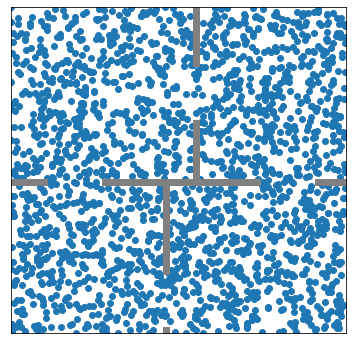

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [13]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

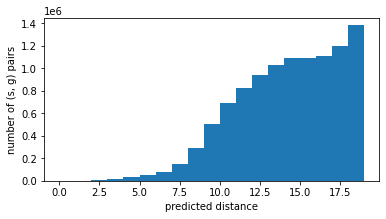

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 229 nodes and 2300 edges


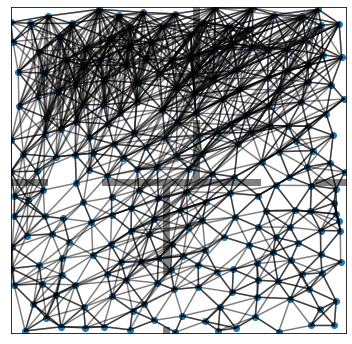

In [15]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1123 edges


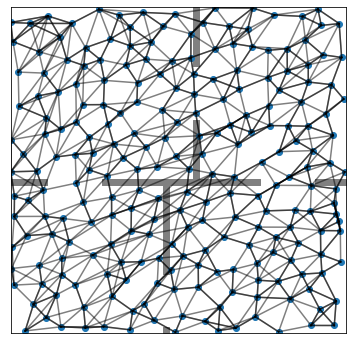

In [16]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 908 edges


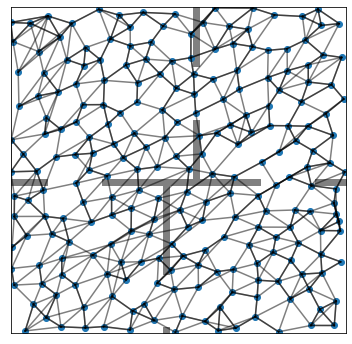

In [17]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 686 edges


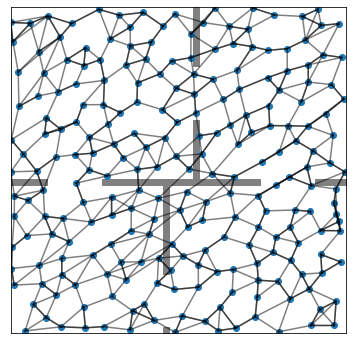

In [18]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 458 edges


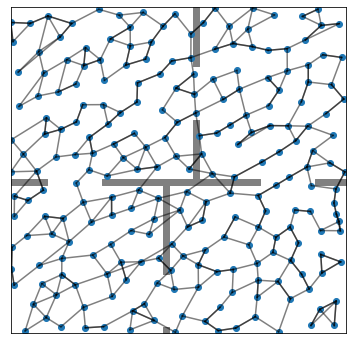

In [19]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 229 edges


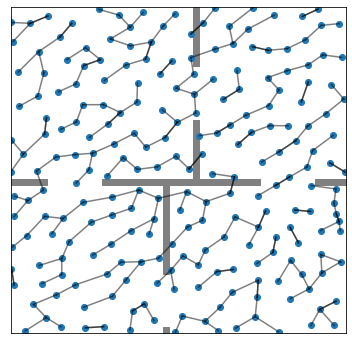

In [20]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

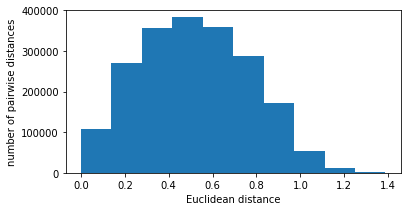

In [21]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [22]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

# Cleanup and evaluate SGM

In [23]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 698.85 seconds
Took 5000 cleanup steps and evaluated SGM success rate in 1230.20 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.45
Took 5000 cleanup steps and evaluated SGM success rate in 990.39 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.95
Took 5000 cleanup steps and evaluated SGM success rate in 715.79 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.80
Took 5000 cleanup steps and evaluated SGM success rate in 752.49 seconds
After filtering and 20000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 660.47 seconds
After filtering and 25000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 629.45 seconds
After filtering and 30000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 652.21 seconds


In [24]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 1.00
Evaluated initial SGM success rate in 195.91 seconds
After filtering and 0 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 621.41 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.95
Took 5000 cleanup steps and evaluated SGM success rate in 663.92 seconds
After filtering and 10000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 617.02 seconds
After filtering and 15000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 633.65 seconds
After filtering and 20000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 683.83 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.95
Took 5000 cleanup steps and evaluated SGM success rate in 678.43 seconds
After filtering and 30000 cleanup steps, SGM has success rate 1.00
Took 5000 c

# Load cleanup graphs

In [25]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

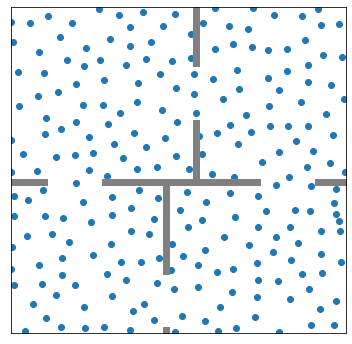

In [26]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1050 edges


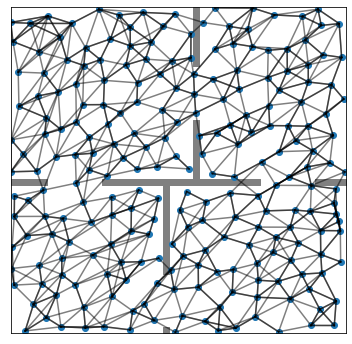

In [27]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1050 edges


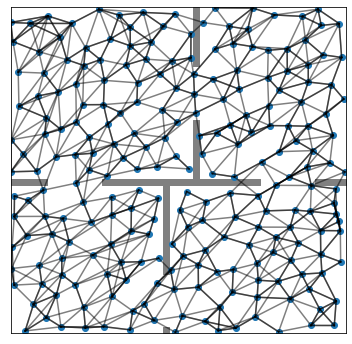

In [28]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1047 edges


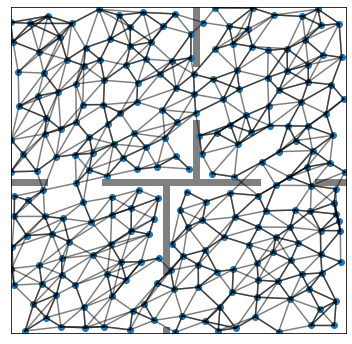

In [29]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 3 edges


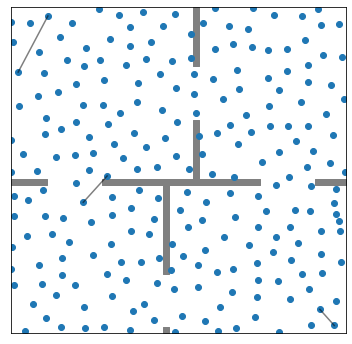

In [30]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)